# CNN on CIFAR10
---

1) Change the code such that it uses GPU

2) Changed the architecture to C1C2C3C40 (basically 3 MPs)

3) Total RF (must be more than 44) = 102

4) One of the layers use Depthwise Separable Convolution

5) One of the layers use Dilated Convolution

6) Used GAP and added FC after GAP to target number of classes

7) Best Test Accuracy = 85.3%, number of epochs = 50, Total Params = 906,528. 

8) Used image augmentation

[Link to Google Colab Code File](https://colab.research.google.com/drive/1gsmdBMLnRb7J9piNocCxsu-FcH8A1YoK)

[Link to helper python files](https://github.com/genigarus/EVA4/tree/master/S7/python_files)

## Google Drive Connection

In [1]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [3]:
import os
os.chdir('drive/EVA4/Session7/python_files')
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/Session7/python_files


# Imports

In [4]:
from __future__ import print_function
import math
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
import matplotlib.pyplot as plt

!pip install torchsummary
from torchsummary import summary

# Model

In [0]:
from model import SeparableConv2d, Net

# Training Code


In [0]:
from training_testing import train

# Testing Code


In [0]:
from training_testing import test

# Regularization Techniques (dropout, L1, L2, etc)


In [0]:
from regularization import  L1_regularization


# Dataloader/Transformations/Image-augmentations


In [0]:
from data_loader import generate_train_test_loader


# Misc Items like finding misclassified images

In [0]:
from utility import *

# Execution(Run models for 50 epochs)

In [0]:
# google drive path for saving models, graphs and images
PATH = "drive/EVA4/Session7"

## Generating Data Loaders

In [12]:
SEED = 1
means, stdevs = find_cifar10_normalization_values()
train_loader, test_loader, test_data = generate_train_test_loader(SEED, means, stdevs)

Files already downloaded and verified
means: (0.0, 0.0, 0.0)
stdevs: (0.24703233, 0.24348505, 0.26158768)
transforms.Normalize(mean = (0.0, 0.0, 0.0), std = (0.24703233, 0.24348505, 0.26158768))
Files already downloaded and verified
Files already downloaded and verified


**************************************************
******************** With Dropout, L1 and L2 Regularization & Image augmentation ********************
**************************************************

 Initializing...


  0%|          | 0/391 [00:00<?, ?it/s]

Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
             ReLU-10          [-1, 128, 32, 32]               0
      BatchNorm2d-11          [-1, 128, 32, 32]             256
          Dropout-12          [-1, 128, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           4,096
    

Loss=1.2687398195266724 Batch_id=390 Accuracy=44.08: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.5077, Accuracy: 4899/10000 (48.99%)

EPOCH: 2


Loss=1.0103574991226196 Batch_id=390 Accuracy=64.30: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0240, Accuracy: 6443/10000 (64.43%)

EPOCH: 3


Loss=1.0310906171798706 Batch_id=390 Accuracy=71.39: 100%|██████████| 391/391 [00:22<00:00, 17.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8393, Accuracy: 7156/10000 (71.56%)

EPOCH: 4


Loss=0.9587575793266296 Batch_id=390 Accuracy=74.89: 100%|██████████| 391/391 [00:22<00:00, 17.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6957, Accuracy: 7576/10000 (75.76%)

EPOCH: 5


Loss=0.8272038102149963 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6536, Accuracy: 7770/10000 (77.70%)

EPOCH: 6


Loss=0.6952941417694092 Batch_id=390 Accuracy=79.11: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8053, Accuracy: 7315/10000 (73.15%)

EPOCH: 7


Loss=0.6607272624969482 Batch_id=390 Accuracy=80.31: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6221, Accuracy: 7879/10000 (78.79%)

EPOCH: 8


Loss=0.7070140838623047 Batch_id=390 Accuracy=81.56: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5830, Accuracy: 8090/10000 (80.90%)

EPOCH: 9


Loss=0.6933215856552124 Batch_id=390 Accuracy=82.55: 100%|██████████| 391/391 [00:22<00:00, 17.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6354, Accuracy: 7881/10000 (78.81%)

EPOCH: 10


Loss=0.6475836634635925 Batch_id=390 Accuracy=83.57: 100%|██████████| 391/391 [00:22<00:00, 17.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5662, Accuracy: 8116/10000 (81.16%)

EPOCH: 11


Loss=0.5981508493423462 Batch_id=390 Accuracy=84.02: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5422, Accuracy: 8139/10000 (81.39%)

EPOCH: 12


Loss=0.7128607630729675 Batch_id=390 Accuracy=85.12: 100%|██████████| 391/391 [00:22<00:00, 18.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5319, Accuracy: 8245/10000 (82.45%)

EPOCH: 13


Loss=0.5554184317588806 Batch_id=390 Accuracy=85.57: 100%|██████████| 391/391 [00:22<00:00, 17.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5641, Accuracy: 8211/10000 (82.11%)

EPOCH: 14


Loss=0.6181403398513794 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [00:22<00:00, 17.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5515, Accuracy: 8191/10000 (81.91%)

EPOCH: 15


Loss=0.527347207069397 Batch_id=390 Accuracy=86.74: 100%|██████████| 391/391 [00:22<00:00, 18.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5154, Accuracy: 8312/10000 (83.12%)

EPOCH: 16


Loss=0.6268503665924072 Batch_id=390 Accuracy=87.30: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5247, Accuracy: 8335/10000 (83.35%)

EPOCH: 17


Loss=0.7927371859550476 Batch_id=390 Accuracy=87.78: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5255, Accuracy: 8334/10000 (83.34%)

EPOCH: 18


Loss=0.43745824694633484 Batch_id=390 Accuracy=88.48: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4865, Accuracy: 8423/10000 (84.23%)

EPOCH: 19


Loss=0.44883736968040466 Batch_id=390 Accuracy=88.77: 100%|██████████| 391/391 [00:22<00:00, 17.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5748, Accuracy: 8189/10000 (81.89%)

EPOCH: 20


Loss=0.5489753484725952 Batch_id=390 Accuracy=88.90: 100%|██████████| 391/391 [00:22<00:00, 17.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5268, Accuracy: 8366/10000 (83.66%)

EPOCH: 21


Loss=0.5312833189964294 Batch_id=390 Accuracy=89.47: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5368, Accuracy: 8334/10000 (83.34%)

EPOCH: 22


Loss=0.5015808939933777 Batch_id=390 Accuracy=89.52: 100%|██████████| 391/391 [00:22<00:00, 17.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5330, Accuracy: 8314/10000 (83.14%)

EPOCH: 23


Loss=0.5613820552825928 Batch_id=390 Accuracy=90.13: 100%|██████████| 391/391 [00:22<00:00, 18.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5480, Accuracy: 8309/10000 (83.09%)

EPOCH: 24


Loss=0.611650288105011 Batch_id=390 Accuracy=90.74: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5937, Accuracy: 8285/10000 (82.85%)

EPOCH: 25


Loss=0.425148069858551 Batch_id=390 Accuracy=90.69: 100%|██████████| 391/391 [00:22<00:00, 18.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5400, Accuracy: 8391/10000 (83.91%)

EPOCH: 26


Loss=0.5096772313117981 Batch_id=390 Accuracy=91.03: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5896, Accuracy: 8296/10000 (82.96%)

EPOCH: 27


Loss=0.6289461851119995 Batch_id=390 Accuracy=91.13: 100%|██████████| 391/391 [00:22<00:00, 17.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5548, Accuracy: 8363/10000 (83.63%)

EPOCH: 28


Loss=0.563931941986084 Batch_id=390 Accuracy=91.33: 100%|██████████| 391/391 [00:22<00:00, 18.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5369, Accuracy: 8403/10000 (84.03%)

EPOCH: 29


Loss=0.38977760076522827 Batch_id=390 Accuracy=91.82: 100%|██████████| 391/391 [00:22<00:00, 17.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5311, Accuracy: 8455/10000 (84.55%)

EPOCH: 30


Loss=0.40887612104415894 Batch_id=390 Accuracy=91.93: 100%|██████████| 391/391 [00:22<00:00, 17.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6009, Accuracy: 8278/10000 (82.78%)

EPOCH: 31


Loss=0.40821999311447144 Batch_id=390 Accuracy=92.18: 100%|██████████| 391/391 [00:22<00:00, 18.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5466, Accuracy: 8429/10000 (84.29%)

EPOCH: 32


Loss=0.35454705357551575 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5362, Accuracy: 8454/10000 (84.54%)

EPOCH: 33


Loss=0.6659569144248962 Batch_id=390 Accuracy=92.44: 100%|██████████| 391/391 [00:22<00:00, 17.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5371, Accuracy: 8447/10000 (84.47%)

EPOCH: 34


Loss=0.6022370457649231 Batch_id=390 Accuracy=93.04: 100%|██████████| 391/391 [00:22<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5303, Accuracy: 8520/10000 (85.20%)

EPOCH: 35


Loss=0.36910778284072876 Batch_id=390 Accuracy=93.08: 100%|██████████| 391/391 [00:22<00:00, 17.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5704, Accuracy: 8377/10000 (83.77%)

EPOCH: 36


Loss=0.4616689682006836 Batch_id=390 Accuracy=92.94: 100%|██████████| 391/391 [00:22<00:00, 17.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5315, Accuracy: 8526/10000 (85.26%)

EPOCH: 37


Loss=0.4996787905693054 Batch_id=390 Accuracy=93.17: 100%|██████████| 391/391 [00:22<00:00, 18.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5920, Accuracy: 8377/10000 (83.77%)

EPOCH: 38


Loss=0.3654504418373108 Batch_id=390 Accuracy=93.32: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5695, Accuracy: 8434/10000 (84.34%)

EPOCH: 39


Loss=0.5017029047012329 Batch_id=390 Accuracy=93.64: 100%|██████████| 391/391 [00:22<00:00, 17.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5786, Accuracy: 8446/10000 (84.46%)

EPOCH: 40


Loss=0.5617819428443909 Batch_id=390 Accuracy=93.54: 100%|██████████| 391/391 [00:22<00:00, 17.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5484, Accuracy: 8471/10000 (84.71%)

EPOCH: 41


Loss=0.3513035178184509 Batch_id=390 Accuracy=94.05: 100%|██████████| 391/391 [00:22<00:00, 18.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5239, Accuracy: 8524/10000 (85.24%)

EPOCH: 42


Loss=0.3100387454032898 Batch_id=390 Accuracy=94.03: 100%|██████████| 391/391 [00:22<00:00, 17.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5518, Accuracy: 8525/10000 (85.25%)

EPOCH: 43


Loss=0.41403207182884216 Batch_id=390 Accuracy=94.20: 100%|██████████| 391/391 [00:21<00:00, 17.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5398, Accuracy: 8501/10000 (85.01%)

EPOCH: 44


Loss=0.32336434721946716 Batch_id=390 Accuracy=94.09: 100%|██████████| 391/391 [00:22<00:00, 17.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5678, Accuracy: 8469/10000 (84.69%)

EPOCH: 45


Loss=0.3497774600982666 Batch_id=390 Accuracy=94.24: 100%|██████████| 391/391 [00:22<00:00, 17.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5400, Accuracy: 8525/10000 (85.25%)

EPOCH: 46


Loss=0.32332825660705566 Batch_id=390 Accuracy=94.41: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5536, Accuracy: 8530/10000 (85.30%)

EPOCH: 47


Loss=0.3039979040622711 Batch_id=390 Accuracy=94.38: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5852, Accuracy: 8470/10000 (84.70%)

EPOCH: 48


Loss=0.31135404109954834 Batch_id=390 Accuracy=94.43: 100%|██████████| 391/391 [00:22<00:00, 17.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5962, Accuracy: 8443/10000 (84.43%)

EPOCH: 49


Loss=0.4317297637462616 Batch_id=390 Accuracy=94.82: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5964, Accuracy: 8445/10000 (84.45%)

EPOCH: 50


Loss=0.42614316940307617 Batch_id=390 Accuracy=94.82: 100%|██████████| 391/391 [00:22<00:00, 17.42it/s]



Test set: Average loss: 0.6062, Accuracy: 8473/10000 (84.73%)


 Saving trained model...

 Visualizing:


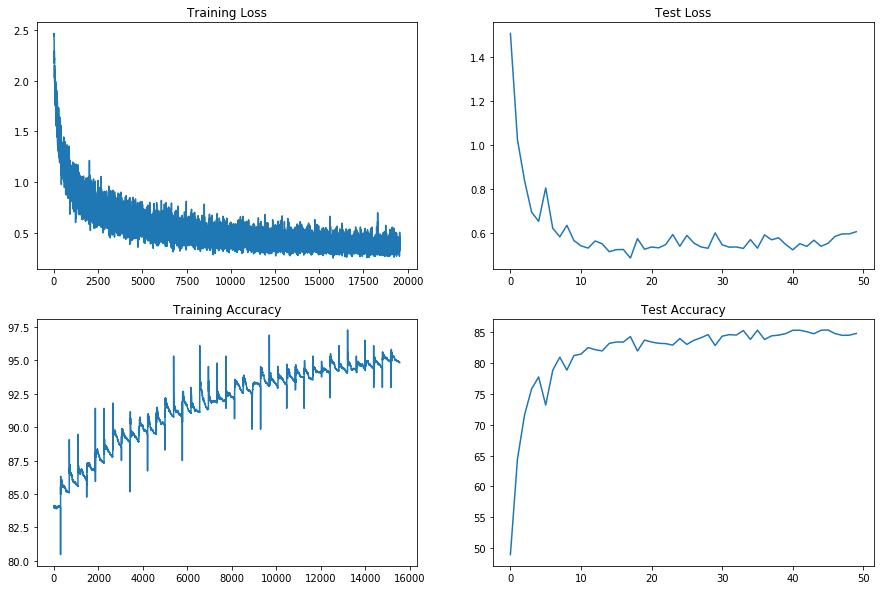

In [16]:
print("*"*50)
print("*"*20,"With Dropout, L1 and L2 Regularization & Image augmentation","*"*20)
print("*"*50)
print("\n Initializing...")
aug_l1_l2_reg_train_losses = []
aug_l1_l2_reg_test_losses = []
aug_l1_l2_reg_train_acc = []
aug_l1_l2_reg_test_acc = []
dropout_value = 0.2
LAMBDA1=1e-5
LR=0.01
MOMENTUM=0.9
WEIGHT_DECAY=1e-5
inp_size = (3, 32, 32)
device = set_device()

print("Creating model...")
aug_l1_l2_model =  Net(dropout_value).to(device)

print("\n Model Summary:")
summary(aug_l1_l2_model, input_size=inp_size)
optimizer = optim.SGD(aug_l1_l2_model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

print("\n Training the model...")
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(aug_l1_l2_model, device, train_loader, optimizer, epoch, aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, l1=True, lambda1=LAMBDA1)
    test(aug_l1_l2_model, device, test_loader, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

print("\n Saving trained model...")
torch.save(aug_l1_l2_model.state_dict(), "../model/cifar10_aug_model_l1_l2.pth")

print("\n Visualizing:")
visualize_graph(aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)